<a href="https://colab.research.google.com/github/cristobalvch/DataScience-For-Business/blob/main/Public-Relations-NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAREA # 1: COMPRENDER EL PROBLEMA Y EL CASO PRÁCTICO


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=11BquVVgQTebvVO5NZ2TGA526rulbWBv5"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figura 1. Análisis del Sentimiento de los Clientes
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1nCRtae4P_PA29o7_ZZxT4KZ_Dwn9pVto)

![alt text](https://drive.google.com/uc?id=1KWse1Fc_seaqEfgnKMTdFRM1Xmo_ZFzb)

# TAREA # 2: IMPORTAR LIBRERÍAS Y DATA SETS

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
# Necesitarás montar tu disco usando los siguientes comandos:
# Para obtener más información sobre el montaje, consulta en: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory
#from google.colab import drive
#drive.mount('/content/drive')

In [33]:
path = 'https://raw.githubusercontent.com/joanby/ds4b/main/5.%20Public%20Relations%20Department/amazon_alexa.tsv'

In [34]:
df = pd.read_csv(path,sep='\t')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [36]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [37]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


# TAREA #3: EXPLORAR EL DATASET

In [38]:
df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

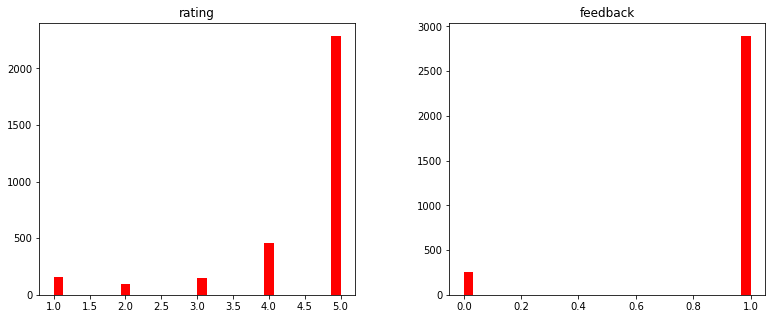

In [39]:
df.hist(bins=30,figsize=(13,5),color='r',grid=False)
plt.show()
#El dataset está balanceado

In [40]:
df['length'] = df['verified_reviews'].apply(len)

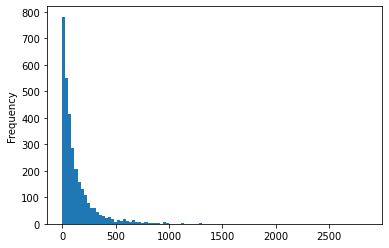

In [41]:
df['length'].plot(bins=100, kind='hist')
plt.show()

In [42]:
df[df['length'].isin([df['length'].min()])]['verified_reviews'].iloc[0]

'😍'

In [43]:
df[df['length'].isin([df['length'].max()])]['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [44]:
df[df['length'].isin([df['length'].mean()])]['verified_reviews'].iloc[0]

'Nice. It works good.Some times is not easy to recognize your voice and you have to repeat several times, some time almost screaming.'

In [45]:
negatives = df[df.feedback.isin([0])]
positives = df[df.feedback.isin([1])]

In [46]:
negatives.describe()

,rating,feedback,length
count,257.000000,257.0,257.000000
mean,1.373541,0.0,215.241245
std,0.484688,0.0,236.325955
min,1.000000,0.0,1.000000
25%,1.000000,0.0,53.000000
50%,1.000000,0.0,137.000000
75%,2.000000,0.0,289.000000
max,2.000000,0.0,1686.000000


In [47]:
positives.describe()

,rating,feedback,length
count,2893.000000,2893.0,2893.000000
mean,4.737643,1.0,124.659177
std,0.546544,0.0,174.624491
min,3.000000,1.0,1.000000
25%,5.000000,1.0,29.000000
50%,5.000000,1.0,69.000000
75%,5.000000,1.0,154.000000
max,5.000000,1.0,2851.000000


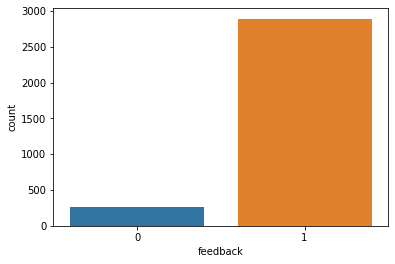

In [48]:
sns.countplot(x=df['feedback'],label='count')
plt.show()

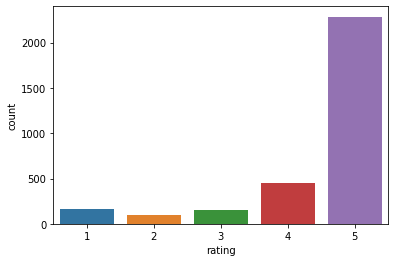

In [49]:
 sns.countplot(x='rating',data=df)

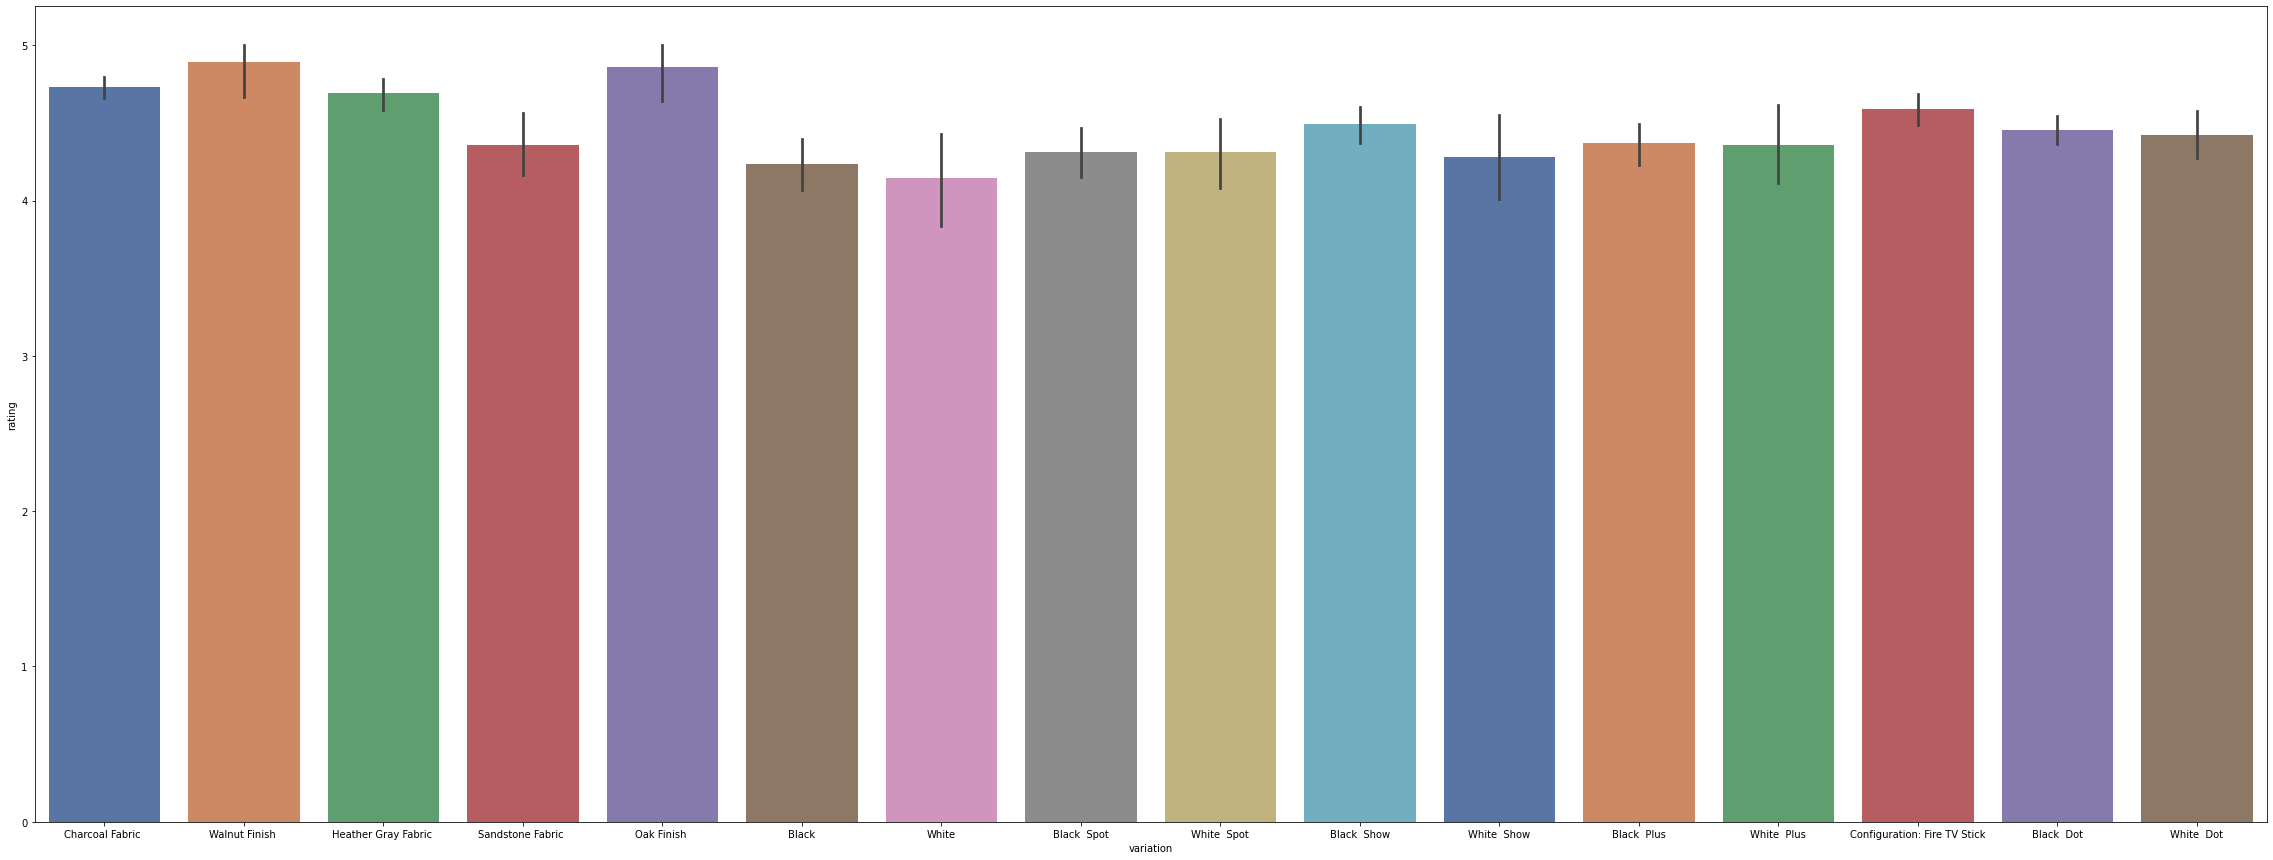

In [50]:
plt.figure(figsize=(40,15))
sns.barplot(x='variation', y='rating', data = df, palette='deep')
plt.show()

In [51]:
sentences = df['verified_reviews'].tolist()
string_sentences = " ".join(sentences)

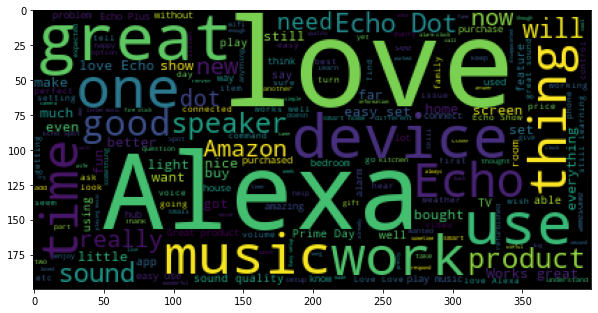

In [52]:
from wordcloud import WordCloud

plt.figure(figsize=(10,10))
wcloud = WordCloud().generate(string_sentences)
plt.imshow(wcloud)
plt.show()

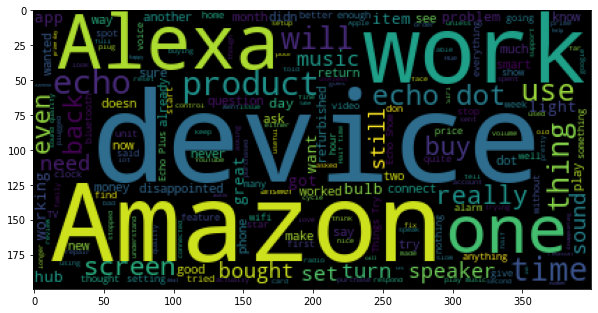

In [53]:
sentences_negatives = negatives['verified_reviews'].tolist()
string_sentences_neg = " ".join(sentences_negatives)
plt.figure(figsize=(10,10))
wcloud = WordCloud().generate(string_sentences_neg)
plt.imshow(wcloud)
plt.show()

# TAREA #4: LLEVAR A CABO LA LIMPIEZA DE DATOS

In [54]:
df = df[['variation','verified_reviews','feedback']]

# TASK #5: LEARN HOW TO REMOVE PUNCTUATION FROM TEXT

# TAREA 6: ENTENDER COMO LIAR LAS STOPWORDS

# TAREA 7: ENTENDER EL PROCESO DE TOKENIZACIÓN

![alt text](https://drive.google.com/uc?id=10dlXiQMdvzLJwNqhnvylAix9_LUQCGQa)

# TAREA #8: LLEVAR A CABO LA LIMPIEZA DE DATOS APLICANDO TODO LO QUE HEMOS APRENDIDO!!

In [55]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
# Definimos un pipeline para limpiar todos los mensajes
# El pipeline realizamos lo siguiente: (1) eliminar signos de putuación, (2) eliminar las stopwords
def message_cleaning(message):
  text_puntuaction = [char for char in message if char not in string.punctuation]
  text_puntuaction = ''.join(text_puntuaction)
  text_clean = [word for word in text_puntuaction.split() if word.lower() not in stopwords.words('english')]

  return text_clean

In [57]:
# Probemos la función que acabamos de crear
reviews_clean = df['verified_reviews'].apply(message_cleaning)

In [58]:
vectorizer = CountVectorizer(analyzer = message_cleaning)
reviews_vect = vectorizer.fit_transform(df['verified_reviews'])

In [61]:
reviews_vect.shape

(3150, 5211)

In [62]:
dummies_var = pd.get_dummies(df['variation'],drop_first=True)

In [63]:
df_clean = pd.concat([df,dummies_var],axis=1)

In [64]:
df_clean = df_clean[df_clean.columns[1:]]

In [65]:
df_clean.drop(['verified_reviews'],axis=1,inplace=True)

In [67]:
reviews = pd.DataFrame(reviews_vect.toarray())
final_df = pd.concat([df_clean,reviews],axis=1)

In [68]:
X = final_df.drop(['feedback'],axis=1)


In [69]:
y = final_df['feedback']

# TAREA #9: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRÁS DE NAÏVE BAYES

![alt text](https://drive.google.com/uc?id=1AyMGr5pZWQ3frRD_84NAM1k765dZNm0S)

![alt text](https://drive.google.com/uc?id=1lLQR8v2Iu8-uXzC7sgNdzVAXjtAkvh2z)

![alt text](https://drive.google.com/uc?id=1KuifCAosRqw0VG0d9itxul4Yjm1LFfHX)

![alt text](https://drive.google.com/uc?id=1XOfRNtgEn6NQcDu-kats3rVMh75hrzZW)

![alt text](https://drive.google.com/uc?id=1JYeNmZFOMDWzzW82ARq851WVhi38pMmp)

![alt text](https://drive.google.com/uc?id=12kQKrWY3pvAWaLazeLSfUrgiQIisd0qX)

![alt text](https://drive.google.com/uc?id=1q3SWsZkfUtxnI6r-uqBZvK8KSnZ_R2qj)

![alt text](https://drive.google.com/uc?id=1swfSHTNQZGOwbPOSc6J775Fe8YDT7A2J)

# TAREA #10: ENTRENAR UN MODELO CLASIFICADOR DE NAÏVE BAYES

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [73]:
from sklearn.naive_bayes import MultinomialNB
nb_multionimal = MultinomialNB()


In [74]:
nb_multionimal.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# TAREA #11: VALIDAR LA EFICACIA DEL MODELO ENTRENADO

![alt text](https://drive.google.com/uc?id=1ZKbO9tQH3qh0IjKwgOAJ37ghWzUVcb8O)

# TAREA #12: RETO FINAL - ENTRENAR Y EVALUAR UN MODELO CLASIFICADOR BASADO EN LA REGRESIÓN LOGÍSTICA

# UN TRABAJO EXCELENTE! PUEDES SENTIRTE ORGULLOSO DE TODO LO QUE ACABAS DE APRENDER